# 目的
石川県の米の作況指数を天候から予想する

# 方法

**データ：**

・石川県加賀地方の米の作況指数

・気象庁の石川県白山市の気象データ

各 **37年分** をもとにデータセットを作成



**学習方法：**

*   SVM
*   ナイーブベイズ
*   Passive-Aggressive

# データ１

特徴量：
*   年間降水量
*   平均気温
*   年間日照時間
*   平均風速

クラス（カテゴリ）：
*   作況指数（100以上 or 100未満）(平均より多いか少ないか)

In [10]:
import pandas as pd
from google.colab import files

upload = files.upload()

df = pd.read_csv('MU.csv', encoding='utf-8')
df.tail()

Saving MU.csv to MU.csv


,年,作況指数(100以上を1),合計降水量,平均気温,合計日照時間,平均風速
33,1983,0,3371,12.3,1561,1.6
34,1982,1,2066,12.4,1671,1.5
35,1981,0,2823,11.5,1548,1.5
36,1980,0,3076,11.7,1393,1.4
37,1979,1,3121,13.1,1585,1.4


In [11]:
df['作況指数(100以上を1)'].value_counts()

1    26
0    12
Name: 作況指数(100以上を1), dtype: int64

In [14]:
#訓練データとテストデータに分ける
from sklearn.model_selection import train_test_split

feature = df.loc[:, ['合計降水量','平均気温','合計日照時間','平均風速']]
target = df.loc[:, ['作況指数(100以上を1)']]

x_feature, y_feature, x_target, y_target = train_test_split(feature, target, train_size=0.8, random_state=1)

In [16]:
#正規化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(x_feature)
x_feature_std = sc.transform(x_feature)
y_feature_std = sc.transform(y_feature)

In [17]:
#SVM
from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf.fit(x_feature_std, x_target)
predicted = clf.predict(y_feature_std)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_target, predicted)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[2, 2],
       [0, 4]])

In [18]:
#ナイーブベイズ
from sklearn.naive_bayes import GaussianNB

clf_n = GaussianNB()
clf_n = clf_n.fit(x_feature_std, x_target)
predicted_n = clf_n.predict(y_feature_std)

confusion_matrix(y_target, predicted_n)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[2, 2],
       [0, 4]])

In [19]:
#Passive-Aggressive
from sklearn.linear_model import PassiveAggressiveClassifier

clf_p = PassiveAggressiveClassifier()
clf_p = clf_p.fit(x_feature_std, x_target)
predicted_p = clf_p.predict(y_feature_std)

confusion_matrix(y_target, predicted_p)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[2, 2],
       [1, 3]])

In [20]:
#決定木
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
clf_tree = clf_tree.fit(x_feature, x_target)
predicted_tree = clf.predict(y_feature)

confusion_matrix(y_target, predicted_tree)

array([[4, 0],
       [3, 1]])

# 結果

最も精度が高い手法

*   正解率：SVM・ナイーブベイズ → 3/4
*   再現率：決定木 → 1
*   適合率：SVM・ナイーブベイズ → 1
*   F値：決定木 → 8/11

# データの変更

米は夏季に育ち，秋に収穫されるため，以下のようにデータを変更して精度の向上を目指す

*   年間降水量 → 6月~8月 の降水量・日照時間・平均気温
*   風速をの除く


In [23]:
import pandas as pd
from google.colab import files

upload = files.upload()

df_2 = pd.read_csv('MU_sum.csv', encoding='utf-8')
df_2.tail()

Saving MU_sum.csv to MU_sum.csv


,年,作況指数(100以上を1),合計降水量,平均気温,合計日照時間,6~8月の平均気温,6~8月の日照時間,6~8月の降水量
33,1983,0,3371,12.3,1561,21,398,849
34,1982,1,2066,12.4,1671,20,442,446
35,1981,0,2823,11.5,1548,22,451,755
36,1980,0,3076,11.7,1393,21,286,748
37,1979,1,3121,13.1,1585,22,455,712


In [36]:
#訓練データとテストデータに分ける
from sklearn.model_selection import train_test_split

feature_2 = df_2.loc[:, ['6~8月の平均気温','6~8月の日照時間','6~8月の降水量']]
target_2 = df_2.loc[:, ['作況指数(100以上を1)']]

x_feature_2, y_feature_2, x_target_2, y_target_2 = train_test_split(feature_2, target_2, train_size=0.8, random_state=1)

In [37]:
#正規化
from sklearn.preprocessing import StandardScaler

sc_2 = StandardScaler()

sc_2.fit(x_feature_2)
x_feature_2_std = sc_2.transform(x_feature_2)
y_feature_2_std = sc_2.transform(y_feature_2)

In [38]:
#SVM
from sklearn import svm
from sklearn.metrics import confusion_matrix

clf_2 = svm.SVC(kernel = 'linear')
clf_2.fit(x_feature_2_std, x_target_2)
predicted_2 = clf_2.predict(y_feature_2_std)

confusion_matrix(y_target_2, predicted_2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[2, 2],
       [0, 4]])

In [39]:
#ナイーブベイズ
from sklearn.naive_bayes import GaussianNB

clf_2_n = GaussianNB()
clf_2_n = clf_2_n.fit(x_feature_2_std, x_target_2)
predicted_2_n = clf_2_n.predict(y_feature_2_std)

confusion_matrix(y_target_2, predicted_2_n)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[2, 2],
       [0, 4]])

In [40]:
#Passive-Aggressive
from sklearn.linear_model import PassiveAggressiveClassifier

clf_2_p = PassiveAggressiveClassifier()
clf_2_p = clf_2_p.fit(x_feature_2_std, x_target_2)
predicted_2_p = clf_2_p.predict(y_feature_2_std)

confusion_matrix(y_target_2, predicted_2_p)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[2, 2],
       [1, 3]])

In [47]:
#決定木
from sklearn import tree

clf_2_tree = tree.DecisionTreeClassifier(criterion='entropy')
clf_2_tree = clf_2_tree.fit(x_feature_2_std, x_target_2)
predicted_2_tree = clf_2_tree.predict(y_feature_2_std)

confusion_matrix(y_target_2, predicted_2_tree)

array([[3, 1],
       [1, 3]])

# 結果
最も精度が高い手法

*   正解率：SVM・ナイーブベイズ・決定木 → 3/4
*   再現率：決定木 → 3/4
*   適合率：SVM・ナイーブベイズ → 1
*   F値：決定木 → 3/4


# データの変更

平均気温にあまり差がないことから，以下のようにデータを変更してみる

*   6月~8月の平均気温を除く


In [49]:
#訓練データとテストデータに分ける
from sklearn.model_selection import train_test_split

feature_3 = df_2.loc[:, ['6~8月の日照時間','6~8月の降水量']]
target_3 = df_2.loc[:, ['作況指数(100以上を1)']]

x_feature_3, y_feature_3, x_target_3, y_target_3 = train_test_split(feature_3, target_3, train_size=0.8, random_state=1)

In [50]:
#正規化
from sklearn.preprocessing import StandardScaler

sc_3 = StandardScaler()

sc_3.fit(x_feature_3)
x_feature_3_std = sc_3.transform(x_feature_3)
y_feature_3_std = sc_3.transform(y_feature_3)

In [51]:
#SVM
from sklearn import svm
from sklearn.metrics import confusion_matrix

clf_3 = svm.SVC(kernel = 'linear')
clf_3.fit(x_feature_3_std, x_target_3)
predicted_3 = clf_3.predict(y_feature_3_std)

confusion_matrix(y_target_3, predicted_3)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1, 3],
       [0, 4]])

In [52]:
#ナイーブベイズ
from sklearn.naive_bayes import GaussianNB

clf_3_n = GaussianNB()
clf_3_n = clf_3_n.fit(x_feature_3_std, x_target_3)
predicted_3_n = clf_3_n.predict(y_feature_3_std)

confusion_matrix(y_target_3, predicted_3_n)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[3, 1],
       [0, 4]])

In [53]:
#Passive-Aggressive
from sklearn.linear_model import PassiveAggressiveClassifier

clf_3_p = PassiveAggressiveClassifier()
clf_3_p = clf_3_p.fit(x_feature_3_std, x_target_3)
predicted_3_p = clf_3_p.predict(y_feature_3_std)

confusion_matrix(y_target_3, predicted_3_p)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1, 3],
       [0, 4]])

In [54]:
#決定木
from sklearn import tree

clf_3_tree = tree.DecisionTreeClassifier(criterion='entropy')
clf_3_tree = clf_3_tree.fit(x_feature_3_std, x_target_3)
predicted_3_tree = clf_3_tree.predict(y_feature_3_std)

confusion_matrix(y_target_3, predicted_3_tree)

array([[3, 1],
       [1, 3]])

# 結果
最も精度が高い手法

*   正解率：ナイーブベイズ → 7/8
*   再現率：ナイーブベイズ・決定木 → 3/4
*   適合率：SVM・ナイーブベイズ・Passive-Aggressive → 1
*   F値：ナイーブベイズ → 3/7


特徴量を 「6～8月の日照時間」，「6～8月の降水量」とした今回が正解率が一番高かった

このデータの学習において，ナイーブベイズが優れていた

最後にこのデータの学習の

*   決定木
*   ナイーブベイズの結果

を示す

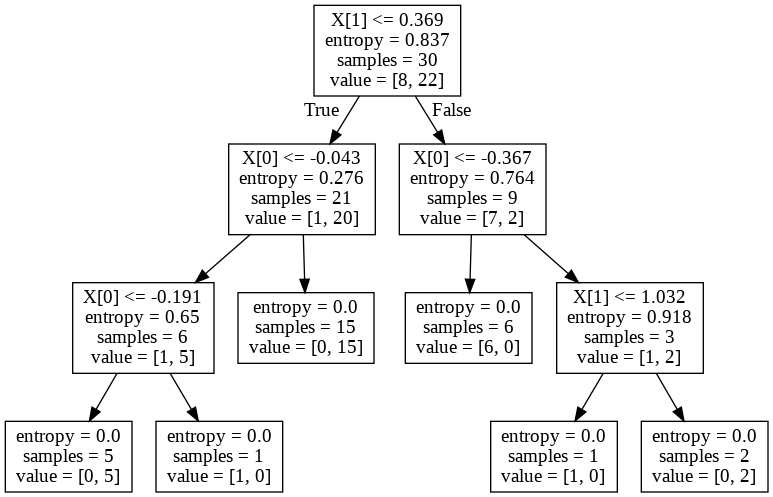

In [56]:
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

dot_data = StringIO()
tree.export_graphviz(clf_3_tree, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


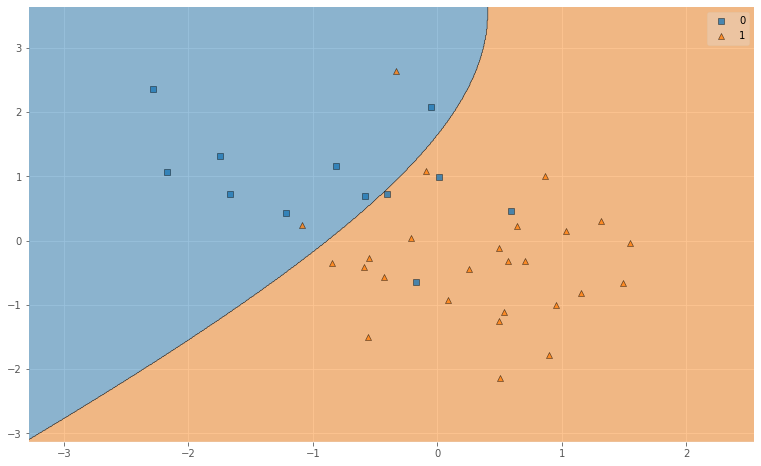

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot')

feature_combined_std = np.vstack((x_feature_3_std, y_feature_3_std))
target_combined = np.hstack((x_target_3.values.T, y_target_3.values.T))
target_combined = np.reshape(target_combined, (-1))

fig = plt.figure(figsize=(13, 8))
plot_decision_regions(feature_combined_std, target_combined, clf_3_n, res=0.02)
plt.show()